# 1.Recoleccion de Datos

In [3]:
import pandas as pd

bikes = pd.read_csv('bikes.csv')
bikes

,temperature,humidity,windspeed,rentals
0,46.716528,0.815969,13.669663,985
1,48.350239,0.800497,15.199782,801
2,34.212394,0.592097,13.247558,1349
3,34.520000,0.623196,11.687963,1562
4,36.800562,0.624643,13.148281,1600
...,...,...,...,...
726,39.102528,0.482493,10.801229,2114
727,39.031972,0.480433,8.996301,3095
728,39.031972,0.717730,11.829425,1341
729,39.243472,0.523039,12.805314,1796


# 2.- Data exploration

In [11]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  731 non-null    float64
 1   humidity     731 non-null    float64
 2   windspeed    731 non-null    float64
 3   rentals      731 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 23.0 KB


In [5]:
bikes.shape

(731, 4)

In [6]:
bikes.describe()

,temperature,humidity,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000
mean,59.509553,0.486937,9.238886,4504.348837
std,15.486114,0.185415,3.379815,1937.211452
min,22.602432,0.000000,0.932208,22.000000
25%,46.117264,0.353548,6.863568,3152.000000
50%,59.758972,0.502227,9.503508,4548.000000
75%,73.048236,0.624671,11.814559,5956.000000
max,90.497028,0.972500,21.126627,8714.000000


In [7]:
import matplotlib as mpl

<Axes: >

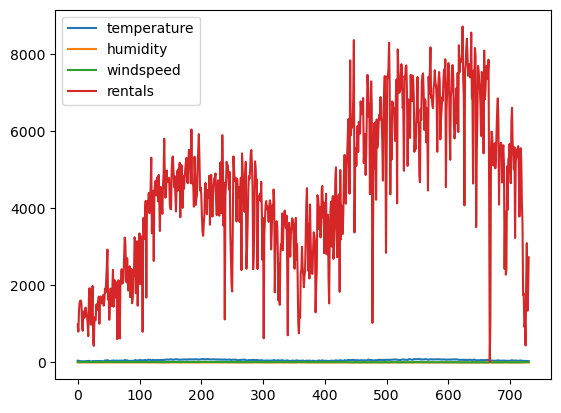

In [8]:
bikes.plot()

<Axes: xlabel='temperature', ylabel='rentals'>

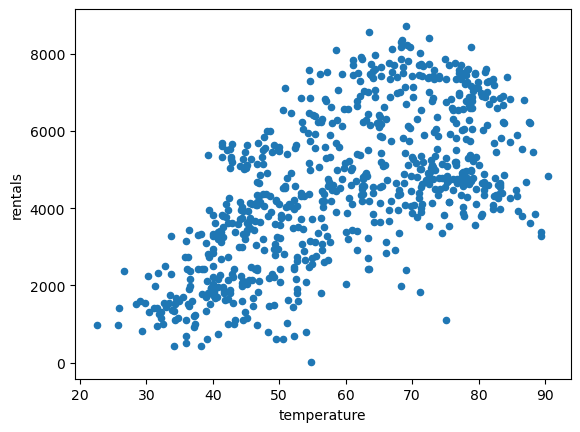

In [9]:
bikes.plot(kind='scatter',x='temperature',y='rentals')

<Axes: xlabel='humidity', ylabel='rentals'>

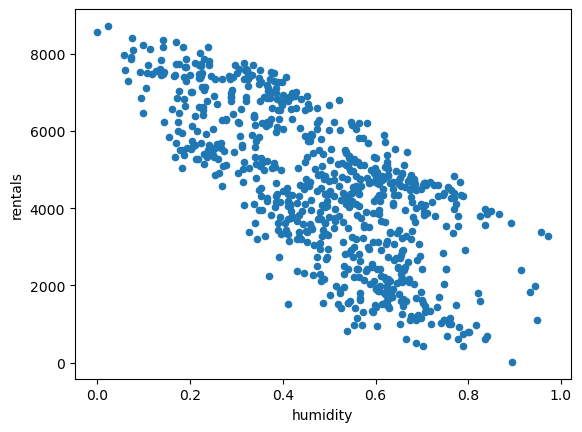

In [10]:
bikes.plot(kind='scatter',x='humidity',y='rentals')

# 3. Prepare the Data

In [26]:
response = 'rentals'

In [27]:
y = bikes[response]

In [28]:
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: rentals, Length: 731, dtype: int64

In [29]:
predictors = list(bikes.columns)
predictors

['temperature', 'humidity', 'windspeed', 'rentals']

In [30]:
predictors.remove(response)
predictors

['temperature', 'humidity', 'windspeed']

In [31]:
x = bikes[predictors]
x

,temperature,humidity,windspeed
0,46.716528,0.815969,13.669663
1,48.350239,0.800497,15.199782
2,34.212394,0.592097,13.247558
3,34.520000,0.623196,11.687963
4,36.800562,0.624643,13.148281
...,...,...,...
726,39.102528,0.482493,10.801229
727,39.031972,0.480433,8.996301
728,39.031972,0.717730,11.829425
729,39.243472,0.523039,12.805314


# 4. Train Model

In [32]:
import sklearn

In [33]:
for metds in dir(sklearn.model_selection):
    print(metds)

BaseCrossValidator
BaseShuffleSplit
GridSearchCV
GroupKFold
GroupShuffleSplit
KFold
LearningCurveDisplay
LeaveOneGroupOut
LeaveOneOut
LeavePGroupsOut
LeavePOut
ParameterGrid
ParameterSampler
PredefinedSplit
RandomizedSearchCV
RepeatedKFold
RepeatedStratifiedKFold
ShuffleSplit
StratifiedGroupKFold
StratifiedKFold
StratifiedShuffleSplit
TimeSeriesSplit
ValidationCurveDisplay
__all__
__builtins__
__cached__
__doc__
__file__
__getattr__
__loader__
__name__
__package__
__path__
__spec__
_plot
_search
_split
_validation
check_cv
cross_val_predict
cross_val_score
cross_validate
learning_curve
permutation_test_score
train_test_split
typing
validation_curve


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1234)

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train,y_train)

# 5. Evaluate the model

In [37]:
model.score(x_test, y_test)

0.9820623857913312